In [2]:
import matplotlib.pyplot as plt
import mpmath as mp
from mpmath import *
import time

gamma = 500
beta = (1-1/gamma**2)**(1/2)
e = 1
rho = 1

# Equations definition

In [3]:
def nu(x):
    return 3*(1-beta**2-beta**2*x)/beta**2/(1+x)
def eta(z,x):
    return -6*z/beta**2/(1+x)
def zeta(z,x):
    return 3*(4*z**2-beta**2*x**2)/4/beta**2/(1+x)
def Omega(z,x):
    temp = eta(z,x)**2/16 - zeta(z,x)*nu(x)/6 + nu(x)**3/216
    return temp + (temp**2-(zeta(z,x)/3+nu(x)**2/36)**3)**(1/2)
def m(z,x):
    return -nu(x)/3 + (zeta(z,x)/3+nu(x)**2/36)*Omega(z,x)**(-1/3) + Omega(z,x)**(1/3)
def alpha(z,x):
    if z<0: 
        out=  1/2*(-(2*m(z,x))**(1/2) + (  -2*(m(z,x)+nu(x))+2*eta(z,x)/(2*m(z,x))**(1/2)   )**(1/2))
    else: 
        out=  1/2*( (2*m(z,x))**(1/2) + (  -2*(m(z,x)+nu(x))-2*eta(z,x)/(2*m(z,x))**(1/2)   )**(1/2))
    return re(out)
def kappa(z,x):
    return (x**2+4*(1+x)*sin(alpha(z,x))**2)**(1/2)

##############################################################
def psi_s(z,x):
    A = e*beta**2/2/rho**2
    return A*(cos(2*alpha(z,x))-1/(1+x))/(kappa(z,x)-beta*(1+x)*sin(2*alpha(z,x)))
def psi_s_norm(z,x):
    return rho**2/e/gamma*psi_s(z/(3*gamma**3),x/gamma**2)

# Warning: ellipf and ellipe return mpf, not float
def psi_x(z,x):
    A = e**2*beta**2/2/rho**2
    T1 = 1/abs(x)/(1+x)*((2+2*x+x**2)*ellipf(alpha(z,x),-4*(1+x)/x**2)-x**2*ellipe(alpha(z,x),-4*(1+x)/x**2))
    D = kappa(z,x)**2-beta**2*(1+x)**2*sin(2*alpha(z,x))**2
    T2 = (kappa(z,x)**2 - 2*beta**2*(1+x)**2 + beta**2*(1+x)*(2+2*x+x**2)*cos(2*alpha(z,x)))/beta/(1+x)/D
    T3 = -kappa(z,x)*(1-beta**2*(1+x)*cos(2*alpha(z,x)))*sin(2*alpha(z,x))/D
    T4 = kappa(z,x)*beta**2*(1+x)*sin(2*alpha(z,x))*cos(2*alpha(z,x))/D
    return re(A*(T1+T2+T3+T4))

def psi_x_norm(z,x):
    return rho**2/e/gamma*psi_x(z/(3*gamma**3),x/gamma**2)

In [4]:
sigmaz=10e-6
sigmax=10e-6
def Lambda_p(z, x): 
    return 1/(2*pi*sigmaz*sigmax)*exp(-x**2/2/sigmax**2)*exp(-z**2/2/sigmaz**2)*(-z/sigmaz**2)

#quad(Lambda_p, [-inf, 0],[-inf, inf])

# Direct integration

In [9]:
# This is the integrand at (z,x) = (0,0)
def intZ(zp,xp):
    return 2*rho/e/beta**2*Lambda_p(-zp/2/rho,-xp)*psi_s(zp,xp)

intZ(10e-6,10e-6)

mpf('-2168724728662076.8')

In [563]:
# Bomb
#intZ(0.000,0.00)

In [1]:
%timeit pass

10.7 ns ± 0.424 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


In [12]:
start = time.time()
%timeit ohno = quad(intZ, [-inf, 0],[-10*sigmax, -10e-12])
end = time.time()
print(end - start)
print(ohno)

4min 1s ± 4.04 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
1936.271014213562


NameError: name 'ohno' is not defined

# Interpolation


In [564]:
import numpy as np
from scipy.interpolate import griddata

# Useful functions
flatten = lambda l: [item for sublist in l for item in sublist]
partition = lambda l,n: [l[i:i + n] for i in range(0, len(l), n)]

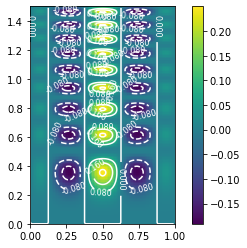

In [565]:
# Example from "https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.griddata.html"
def func(x, y):
    return x*(1-x)*np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2
grid_x, grid_y = np.mgrid[0:1:101j, 0:1:201j]
points = np.random.rand(1000, 2)
values = func(points[:,0], points[:,1])

grid_z2 = griddata(points, values, (grid_x, grid_y), method='cubic')

x = np.arange(0, 1, 0.01)
y = np.arange(0, 1.5, 0.01)
xx, yy = np.meshgrid(x, y)
zzz=func(xx,yy)

contours=plt.contour(xx,yy,zzz,5,colors='white')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(zzz, extent=[0, 1, 0, 1.5], origin='lower',
           cmap='viridis', alpha=1)
plt.colorbar();

Text(0.5, 1.0, 'psi_s')

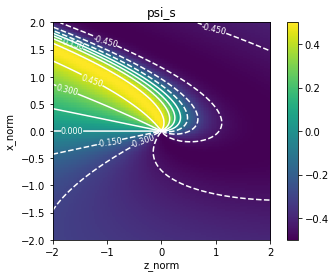

In [478]:
#x = np.arange(-0.002, 0.002, 0.0001)
#y = np.arange(-0.003, 0.003, 0.0001)
z = np.arange(-2, 2, 0.03)
x = np.arange(-2, 2, 0.03)
zz, xx = np.meshgrid(z, x)
#temp=list(map(psi_s_norm,flatten(zz),flatten(xx)))
temp=[psi_s_norm(i,j) for j in x for i in z]  # Omit mapping...
lalala=np.array(partition(temp,z.shape[0]),dtype=float) # Convert list to np.array

contours=plt.contour(zz,xx,lalala, 8,colors='white')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(lalala, extent=[-2,2,-2,2], origin='lower', cmap='viridis', alpha=1)
plt.colorbar();
plt.xlabel('z_norm')
plt.ylabel('x_norm')
plt.title('psi_s')

In [572]:
z = np.arange(-3, 3, 0.05)
x = np.arange(-2, 2, 0.05)
zz, xx = np.meshgrid(z, x)

#grid_x, grid_y = np.mgrid[0:1:101j, 0:1:201j]

points = np.random.rand(2000, 2)
points = 6*points-3
t2=[psi_s_norm(i[0],i[1]) for i in points]
values = np.array(t2,dtype=float)

method = 'linear'  # nearest, linear, or cubic
interp = griddata(points, values, (zz,xx), method=method)

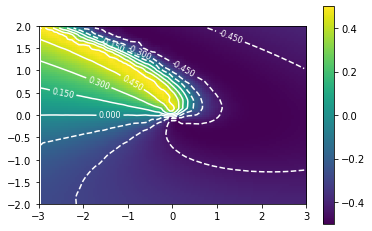

In [573]:
contours=plt.contour(zz,xx,interp, 8,colors='white')
plt.clabel(contours, inline=True, fontsize=8)
plt.imshow(interp, extent=[-3,3,-2,2], origin='lower',cmap='viridis', alpha=1)
plt.colorbar();

In [574]:
# Evaluate the function at the grid points directly
ref = [psi_s_norm(i,j) for j in x for i in z] 
ref = np.array(partition(ref,z.shape[0]),dtype=float)

/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  


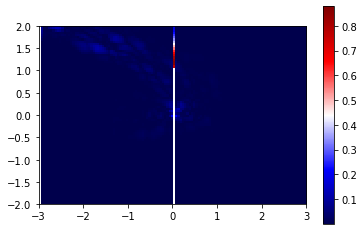

In [491]:
diff  = np.abs(ref - interp)
#diff2 = np.multiply(diff,diff) # square the diff

#contours=plt.contour(zz,xx,diff,5,colors='black')
#plt.clabel(contours, inline=True, fontsize=8)
plt.imshow(diff, extent=(-3,3,-2,2), origin='lower',cmap='seismic')
plt.colorbar()

# Testing

In [568]:
z = np.arange(-3, 3, 0.05)
x = np.arange(-2, 2, 0.05)
print(x[40])
print(z[60])

1.7763568394002505e-15
-1.0658141036401503e-14


In [575]:
ref = [psi_s_norm(i,j) for j in x for i in z] 
ref = np.array(partition(ref,z.shape[0]),dtype=float)

print(psi_s_norm(z[0],x[0]))
print(ref[0][0])
print(psi_s_norm(z[60],x[40]))
print(ref[60][40])

/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  


-0.274668755975623
-0.27466875597562307
nan
0.49999599997661237


In [576]:
print([psi_s_norm(z[60],x[j]) for j in range(3)])
print([ref[60][j] for j in range(3)])

[mpf('nan'), mpf('nan'), mpf('nan')]
[0.24187570466170305, 0.2456824196702526, 0.24960414367269823]


/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


In [552]:
len(x)

80

In [581]:
float(psi_s_norm(z[60],x[0]))

/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


nan